<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
X = 6*np.random.rand(200,1)-3
y = 0.8*X**2 + 0.9 * X+2 + np.random.randn(200,1)

#y = 0.8x^2 + 0.9x +2

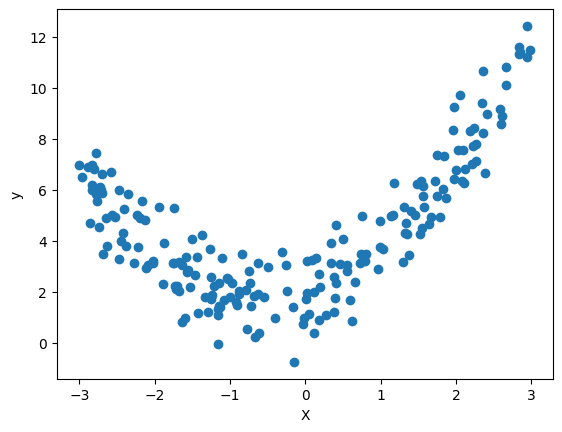

In [5]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
# Applying polynomial Linear Regression
# Degree 2
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [17]:
print(X_train[0])
print(X_train_trans[0])

[-1.58505116]
[ 1.         -1.58505116  2.51238717]


In [18]:
X_train_trans.shape

(160, 3)

In [19]:
#include_bias parameter
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test_trans)

In [21]:
r2_score(y_test,y_pred)

0.8539108742075807

In [22]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.89854092 0.81572272]]
[2.01742077]


In [23]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

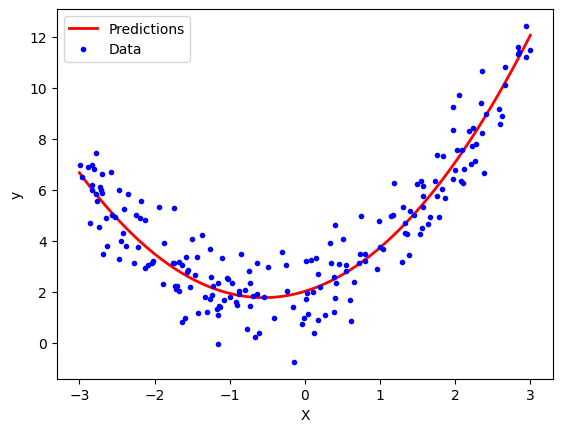

In [25]:
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.plot(X,y,"b.",label="Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [26]:
def polynomial_regression(degree):
  X_new = np.linspace(-3,3,100).reshape(100,1)
  X_new_poly = poly.transform(X_new)
  polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
      ("poly_features",polybig_features),
      ("std_scaler",std_scaler),
      ("lin_reg",lin_reg)
  ])
  polynomial_regression.fit(X,y)
  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new,y_newbig,"r-",linewidth=2,label="Predictions")
  plt.plot(X,y,"b.",label="Data")

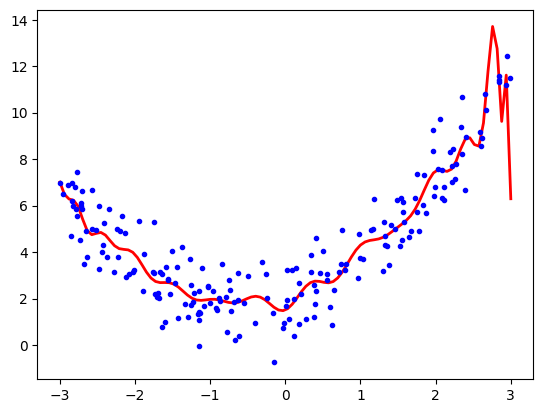

In [32]:
polynomial_regression(30)

# Multiple Polynomial Regression

In [33]:
#3d polynomial regression
x = 7*np.random.rand(100,1) -2.8
y = 7*np.random.rand(100,1) -2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.randn(100,1)

In [34]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
fig.show()

In [35]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)
x_input = np.linspace(x.min(),y.max(),10)
y_input = np.linspace(y.min(),y.max(),10)
xGrid, yGrid = np.meshgrid(x_input,y_input)
zGrid = lr.predict(np.array([xGrid,yGrid]).reshape(100,2))

In [37]:
X_multi = np.array([x,y]).reshape(100,2)

In [38]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [40]:
# print("input",poly.n_input_features_)
print("output",poly.n_output_features_)

output 6


In [41]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()